In [1]:
#%run init.ipynb

## Trace
\begin{equation}
Tr(A) := \sum_{j}A_{j,j}
\end{equation}

In [2]:
def trace(A):
    d = A.shape[0]; tr = 0.0
    for j in range(0,d):
        tr += A[j,j]
    return tr

In [3]:
#trace(pauli(1)**2)

### Eigenvalues

In [4]:
# Outside this function, initialize: evals = zeros(d,1)
def eVals(A):
    d = A.shape[0]; evals = zeros(d,1)
    eig = A.eigenvects()
    ne = 0
    j = 0
    lk = 0
    while ne < d:
        mult = eig[j][1]
        ne += mult
        nk = lk + mult
        for k in range(lk,nk):
            evals[k] = eig[j][0]
        lk = nk
        j += 1
    return evals

In [7]:
#eVals(pauli(1))

### Square root of an Hermitian matrix
\begin{equation}
\sqrt{A}=\sum_{j=1}^{d}\sqrt{a_{j}}|a_{j}\rangle\langle a_{j}|
\end{equation}

In [8]:
def mat_sqrt(A):
    d = A.shape[0]; eig = A.eigenvects()
    Asqrt = zeros(d,d)
    ne = 0
    j = 0
    lk = 0
    while ne < d:
        mult = eig[j][1]
        ne += mult
        for k in range(0,mult):
            Proj = proj(eig[j][2][k])
            Asqrt += sqrt(eig[j][0])*(Proj/trace(Proj))
        j += 1
    return Asqrt

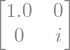

In [9]:
#mat_sqrt(pauli(3))

### Trace norm
\begin{equation}
||A||_{tr} = \mathrm{Tr}\sqrt{A^{\dagger}A} = \sum_{j}|a_{j}|,
\end{equation}
for $A=\sum_{j}a_{j}|a_{j}\rangle\langle a_{j}|$.

In [10]:
def norm_tr(A):
    d = A.shape[0]; eva = eVals(A)
    TrNorm = 0
    for j in range(0,d):
        TrNorm += abs(eva[j])
    return TrNorm

In [12]:
#norm_tr(pauli(3))